In [92]:
import pandas as pd 
data = pd.read_csv(r"C:\Users\kamal\Downloads\archive (4)\Plant_1_Weather_Sensor_Data.csv")

In [68]:
data

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [93]:
data = data.drop(["PLANT_ID","SOURCE_KEY"],axis = 1)
data

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,24.621525,22.165423,0.0
...,...,...,...,...
3177,2020-06-17 22:45:00,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,21.969495,20.734963,0.0


In [94]:
data["DATE_TIME"] = pd.to_datetime(data["DATE_TIME"])
data.set_index('DATE_TIME',inplace=True)
data

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,
2020-05-15 00:00:00,25.184316,22.857507,0.0
2020-05-15 00:15:00,25.084589,22.761668,0.0
2020-05-15 00:30:00,24.935753,22.592306,0.0
2020-05-15 00:45:00,24.846130,22.360852,0.0
2020-05-15 01:00:00,24.621525,22.165423,0.0
...,...,...,...
2020-06-17 22:45:00,22.150570,21.480377,0.0
2020-06-17 23:00:00,22.129816,21.389024,0.0
2020-06-17 23:15:00,22.008275,20.709211,0.0


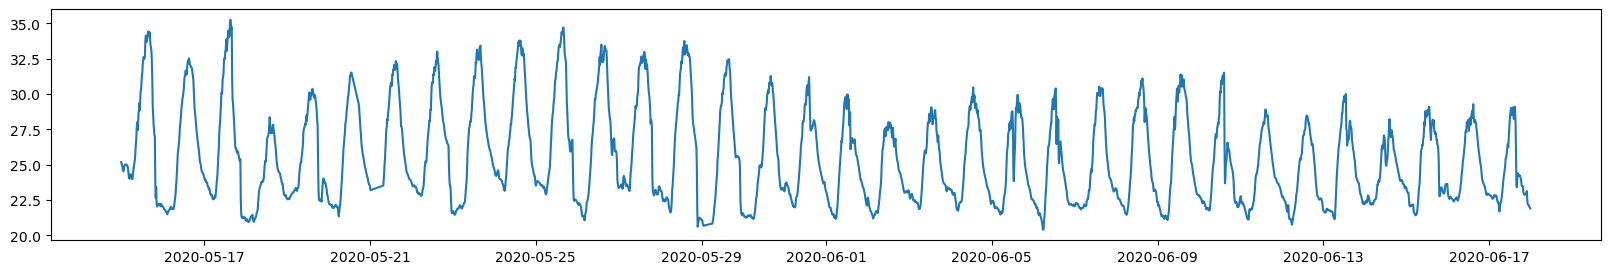

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,3))
plt.plot(data["AMBIENT_TEMPERATURE"])

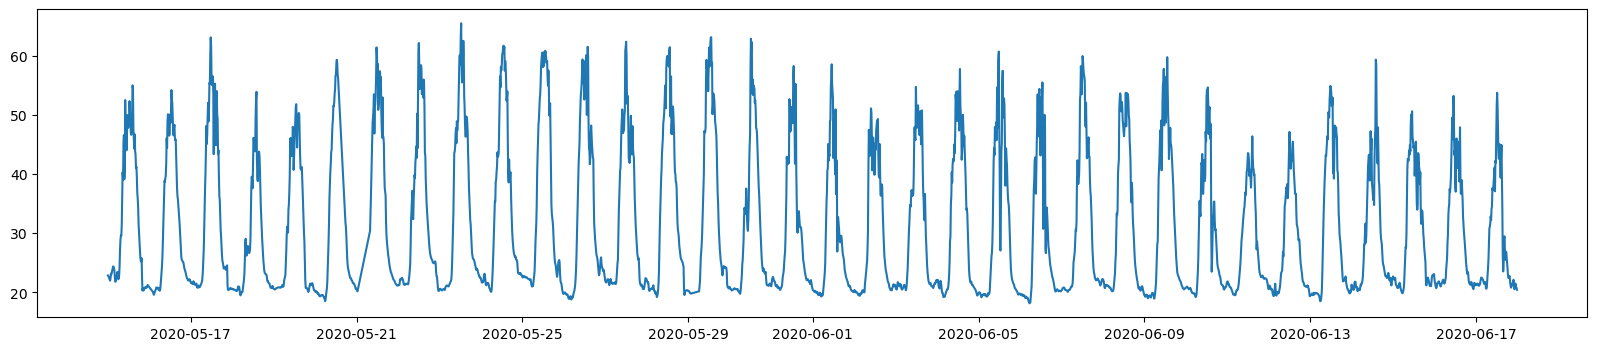

In [74]:
plt.figure(figsize=(20,4))
plt.plot(data["MODULE_TEMPERATURE"])

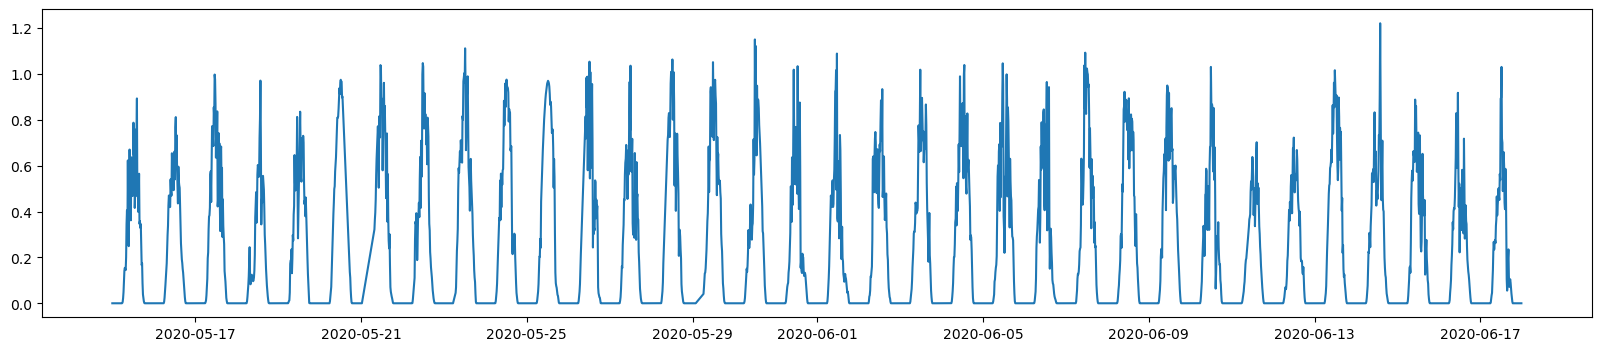

In [75]:
plt.figure(figsize=(20,4))
plt.plot(data["IRRADIATION"])

In [76]:
from statsmodels.tsa.stattools import adfuller
adfuller(data['AMBIENT_TEMPERATURE'],autolag='AIC')

(-13.683582041437804,
 1.3858180533477935e-25,
 20,
 3161,
 {'1%': -3.432420426540509,
  '5%': -2.8624547875535526,
  '10%': -2.56725696255705},
 2152.9490896316847)

<Axes: xlabel='DATE_TIME'>

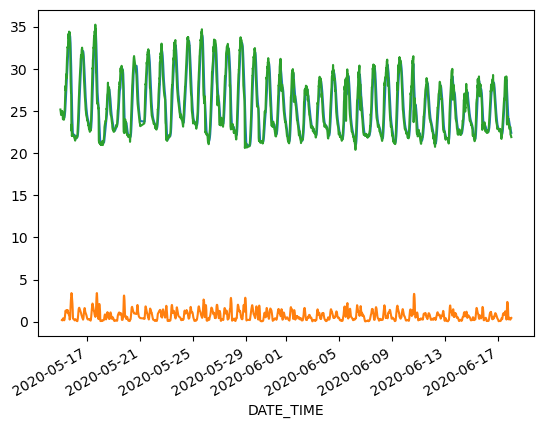

In [77]:
# p>0 so AMBIENT_TEMPERATURE is not stationary
ts = data ["AMBIENT_TEMPERATURE"]
ts.rolling(12).mean().plot()
ts.rolling(12).std().plot()
ts.plot()

<Axes: xlabel='DATE_TIME'>

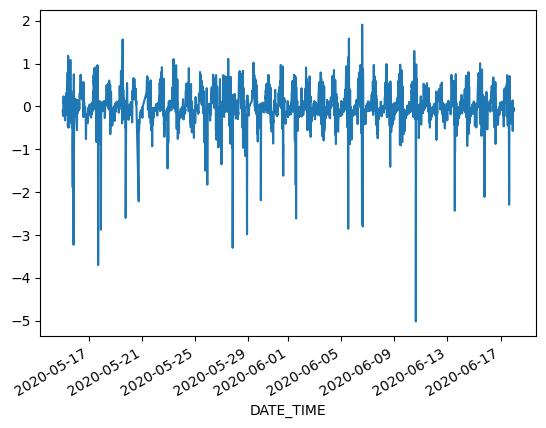

In [78]:
data["TEMP"] = data["AMBIENT_TEMPERATURE"] - data["AMBIENT_TEMPERATURE"].shift(1)
data["TEMP"].plot()

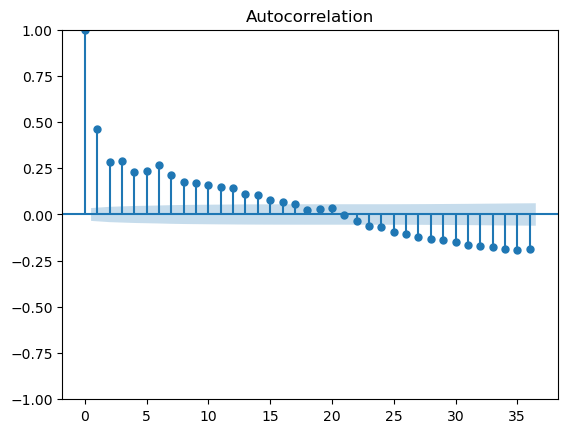

In [79]:
import statsmodels.graphics.tsaplots as tsap
fig_first = tsap.plot_acf(data["TEMP"].dropna())

In [80]:
import statsmodels.api as stm
model = stm.tsa.statespace.SARIMAX(data['AMBIENT_TEMPERATURE'],order=(0,1,0), seasonal_order=(1,1,1,12))
arima = model.fit()
print (arima.summary())

C:\Users\kamal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kamal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                  AMBIENT_TEMPERATURE   No. Observations:                 3182
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -1623.744
Date:                              Sun, 16 Apr 2023   AIC                           3253.488
Time:                                      20:06:41   BIC                           3271.671
Sample:                                           0   HQIC                          3260.010
                                             - 3182                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1484      0.014     10.519      0.000       0.121       0.176
ma.S.L12      -1.00

<Axes: xlabel='DATE_TIME'>

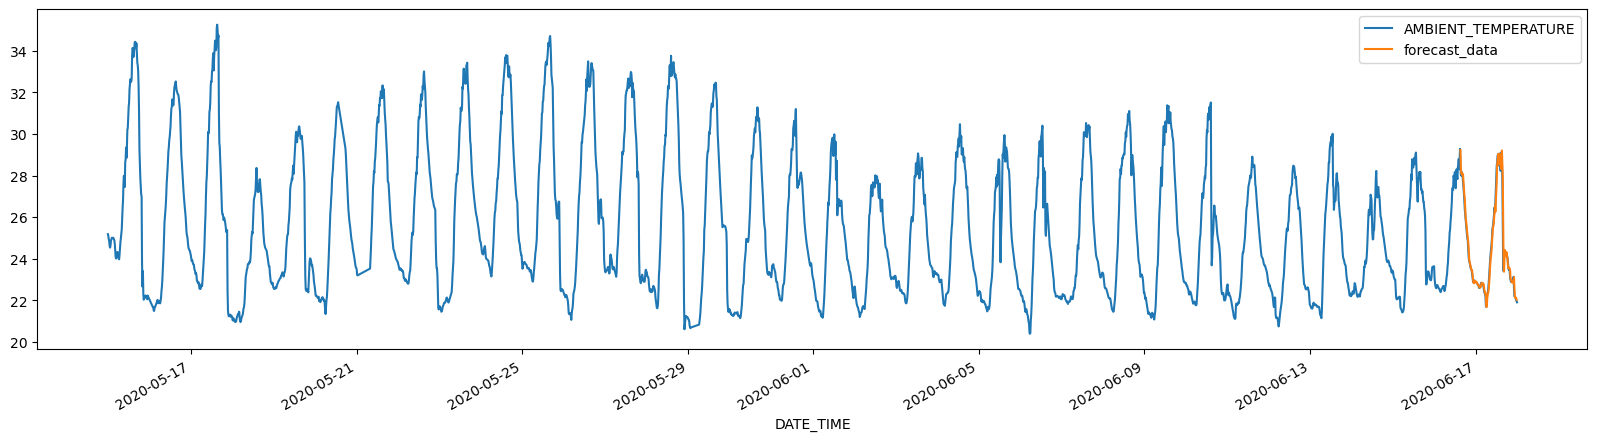

In [106]:
data['forecast_data'] = arima.predict(start = 3050, end= 3180,dynamic = False)  
data [["AMBIENT_TEMPERATURE",'forecast_data']]. plot(figsize = (20,5))

<Axes: xlabel='DATE_TIME'>

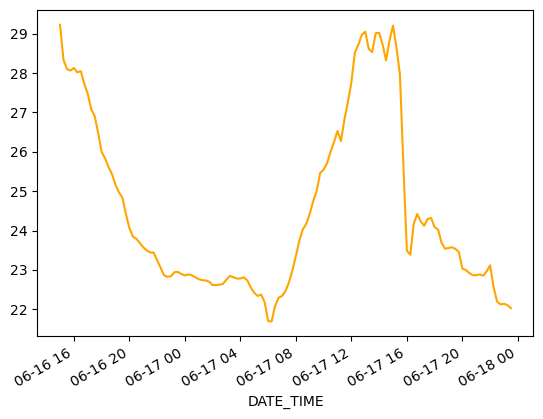

In [111]:
data["forecast_data"].plot(color = "orange")